In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chelsearamos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load Data

In [4]:
path_to_dir = 'data'

df = prep.merge_csv_mult_dir(path_to_dir)

	Non-zip folders/files found in data: ['links_1', 'links_2', 'links_3', 'links_4']


In [5]:
print('Shape:', df.shape)
df.head()

Shape: (409750, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",NaN,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,NaN,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1


In [6]:
eda.get_nulls(df)

,Total,Percent,Type
user_location,72162,0.176112,object
folder,0,0.000000,object
csv,0,0.000000,object
rating,0,0.000000,float64
helpful_vote,0,0.000000,int64
user_name,0,0.000000,object
review_body,0,0.000000,object
review_date,0,0.000000,object
hotel_name,0,0.000000,object
url,0,0.000000,object


In [7]:
df = prep.clean_and_prep(df)

print('Shape:', df.shape)
df.head()

Shape: (409750, 16)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,thechronictraveller,1.0,2,positive
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,bitsmom_tn,1.0,2,positive
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",n/a,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,D7133GLjoannew,1.0,2,positive
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Adrian L,1.0,2,positive
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,n/a,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Lydia B,1.0,2,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409750 entries, 0 to 409749
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   review_id        409750 non-null  int64  
 1   url              409750 non-null  object 
 2   hotel_name       409750 non-null  object 
 3   review_date      409750 non-null  object 
 4   review_body      409750 non-null  object 
 5   user_location    409750 non-null  object 
 6   user_name        409750 non-null  object 
 7   helpful_vote     409750 non-null  int64  
 8   rating           409750 non-null  float64
 9   csv              409750 non-null  object 
 10  folder           409750 non-null  object 
 11  city             409750 non-null  object 
 12  user_name_clean  409750 non-null  object 
 13  polarity         409750 non-null  float64
 14  sentiment_int    409750 non-null  int64  
 15  sentiment        409750 non-null  object 
dtypes: float64(2), int64(3), object(11)
me

# EDA

In [9]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 409746
url: 82044
hotel_name: 436
review_date: 5735
review_body: 409698
user_location: 39249
user_name: 361718
helpful_vote: 971
rating: 5
csv: 436
folder: 4
city: 52
user_name_clean: 322923
polarity: 3
sentiment_int: 3
sentiment: 3


In [10]:
df.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,4.097500e+05,409750.000000,409750.000000,409750.000000,409750.000000
mean,4.356959e+08,27.362257,4.197699,0.858137,1.716273
std,1.977395e+08,312.543620,1.065560,0.306338,0.612675
min,7.051910e+05,0.000000,1.000000,0.000000,0.000000
25%,2.629676e+08,1.000000,4.000000,1.000000,2.000000
50%,4.490815e+08,7.000000,5.000000,1.000000,2.000000
75%,6.111276e+08,25.000000,5.000000,1.000000,2.000000
max,7.561354e+08,117229.000000,5.000000,1.000000,2.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ada1690>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

Text(93.2, 0.5, '')

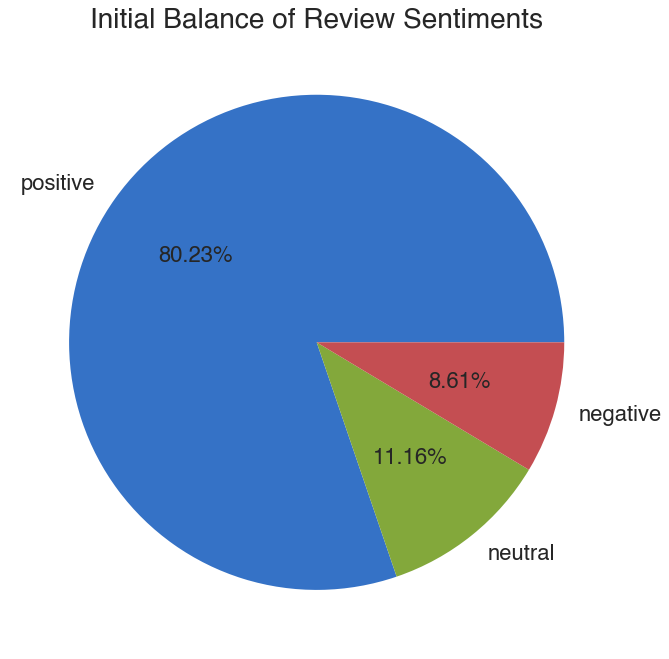

In [11]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  409750


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a35e60350>)

Text(0.5, 1, 'Counts of Hotel Ratings')

Text(0.5, 41.400000000000006, 'Hotel Rating')

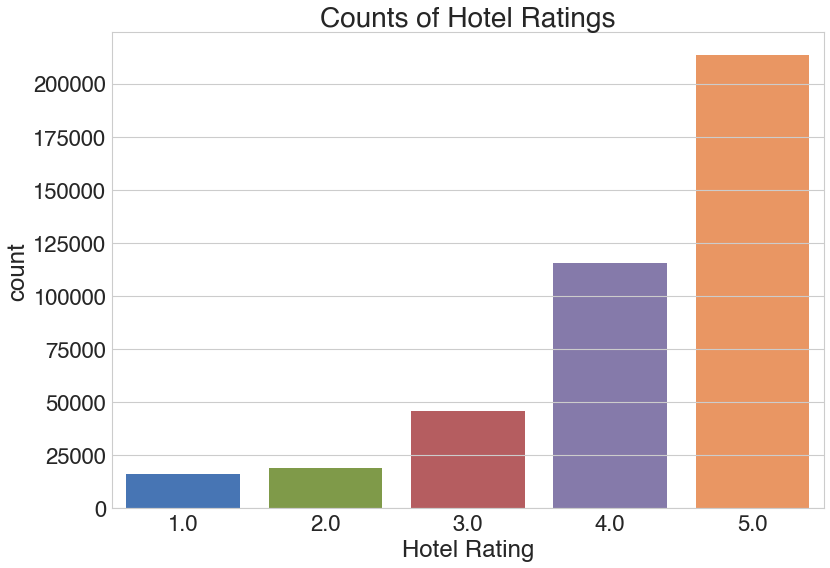

In [12]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

# Train-Test-Val Split

In [13]:
target = 'sentiment'
features = ['review_body']
X_train, X_val, X_test, y_train, y_val, y_test, \
    indices_train, indices_val, indices_test = prep.train_test_val_split(df, target, features)

	Train: 262240, Val: 65560, Test: 81950


In [14]:
indices_train.shape, indices_val.shape, indices_test.shape

((262240,), (65560,), (81950,))

## Handling class imbalance by under-sampling train data

In [15]:
train_df_us = prep.undersample_train(df, target, indices_train, y_train)

	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 210407
		Number neutral in train: 29262
		Number negative in train: 22571
	Final undersampled train size: 67713


Total Number of Ratings:  67713


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a3a6f41d0>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

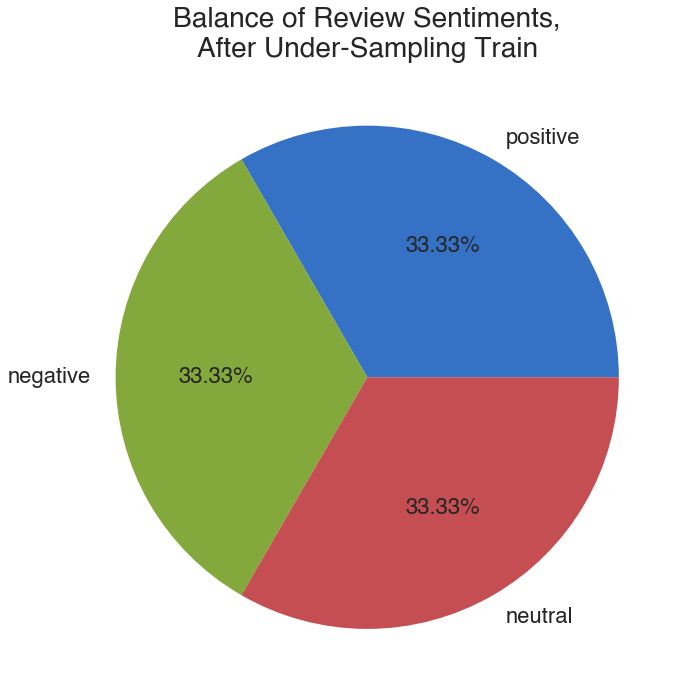

In [16]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')

# Modeling with TF-IDF

In [17]:
# ! python src/preprocess.py data

```
Processing files in data...
	Non-zip folders/files found in data: ['links_1']

Splitting data into train/val/test...
	Train: 213140, Val: 53285, Test: 66607
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 166155
		Number neutral in train: 26299
		Number negative in train: 20686
	Final undersampled train size: 62058
    
Getting bag of words for train data...

Starting modeling...

	Fitting LogisticRegression...
                Scores: {'fit_time': array([14.73221493, 14.67445898, 14.61940336, 14.66072369, 14.82588744]), 'score_time': array([1.42016864, 1.41654634, 1.41894245, 1.41845775, 1.41838765]), 'test_accuracy': array([0.75580084, 0.75733161, 0.7546729 , 0.75707034, 0.75183305]), 'train_accuracy': array([0.81660154, 0.81801152, 0.81873666, 0.81743106, 0.81745121])}
                Average train accuracy: 0.8176463969614115
                Average test accuracy: 0.7553417483627481
        
        
    Fitting MultinomialNB...
                Scores: {'fit_time': array([10.13023186, 10.1286757 , 10.13355589, 10.13215995, 10.13620377]), 'score_time': array([1.41610551, 1.41577578, 1.4157331 , 1.41798496, 1.41525722]), 'test_accuracy': array([0.7296165 , 0.7340477 , 0.72655495, 0.73168963, 0.72959471]), 'train_accuracy': array([0.7589131 , 0.75846997, 0.75959795, 0.75797128, 0.75811227])}
                Average train accuracy: 0.7586129151047422
                Average test accuracy: 0.7303006974596283


        Fitting RandomForestClassifier...
                Scores: {'fit_time': array([135.37750936, 135.43342757, 136.33951545, 135.32857227,
       135.47986341]), 'score_time': array([1.94026279, 1.93801475, 1.94030833, 1.94585085, 1.93872213]), 'test_accuracy': array([0.70488237, 0.70995811, 0.7087496 , 0.70904842, 0.69680122]), 'train_accuracy': array([1., 1., 1., 1., 1.])}
                Average train accuracy: 1.0
                Average test accuracy: 0.705887944725258


        Fitting GradientBoostingClassifier...
                Scores: {'fit_time': array([263.72342896, 266.55406952, 263.8704145 , 265.59878659,
       265.58436465]), 'score_time': array([1.4826808 , 1.48225331, 1.47889447, 1.48168659, 1.48074532]), 'test_accuracy': array([0.69416694, 0.69972607, 0.69344183, 0.69800983, 0.6876964 ]), 'train_accuracy': array([0.71729847, 0.71687548, 0.71788261, 0.71780772, 0.71849256])}
                Average train accuracy: 0.7176713680849213
                Average test accuracy: 0.6946082131200184


        Fitting XGBClassifier...
                Scores: {'fit_time': array([21.48981547, 21.50380468, 21.49269342, 21.56712437, 21.57016969]), 'score_time': array([1.61389542, 1.61442304, 1.61841702, 1.60971189, 1.61087203]), 'test_accuracy': array([0.72824686, 0.73324202, 0.73001934, 0.73249537, 0.72129562]), 'train_accuracy': array([0.85400637, 0.8536438 , 0.85275752, 0.85267992, 0.85541926])}
                Average train accuracy: 0.8537013733264303
                Average test accuracy: 0.7290598419431495
```

# LSTM

## Initial

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 250, 50)           9273100
_________________________________________________________________
lstm (LSTM)                  (None, 250, 50)           20200
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                2440
_________________________________________________________________
dropout (Dropout)            (None, 10)                0
_________________________________________________________________
dense (Dense)                (None, 8)                 88
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27
=================================================================
Total params: 9,295,855
Trainable params: 9,295,855
Non-trainable params: 0

Epoch 1/10
1059/1059 [==============================] - 362s 342ms/step - loss: 1.0864 - accuracy: 0.3643
Epoch 2/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.9109 - accuracy: 0.5358
Epoch 3/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.7072 - accuracy: 0.6770
Epoch 4/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.6283 - accuracy: 0.7241
Epoch 5/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.5818 - accuracy: 0.7497
Epoch 6/10
1059/1059 [==============================] - 376s 355ms/step - loss: 0.5502 - accuracy: 0.7666
Epoch 7/10
1059/1059 [==============================] - 386s 365ms/step - loss: 0.5234 - accuracy: 0.7808
Epoch 8/10
1059/1059 [==============================] - 384s 363ms/step - loss: 0.4974 - accuracy: 0.7972
Epoch 9/10
1059/1059 [==============================] - 378s 357ms/step - loss: 0.4776 - accuracy: 0.8064
Epoch 10/10
1059/1059 [==============================] - 386s 364ms/step - loss: 0.4598 - accuracy: 0.8167
2117/2117 [==============================] - 97s 46ms/step - loss: 0.3970 - accuracy: 0.8528

2117/2117 [==============================] - 99s 47ms/step - loss: 0.3970 - accuracy: 0.8528
Training Accuracy:  0.852760910987854
2049/2049 [==============================] - 117s 57ms/step - loss: 0.5592 - accuracy: 0.7957
Test Accuracy:  0.7957443594932556
```

## 2nd

# Recommender System

## Check Data Sparsity

In [18]:
train_df_us.head()

,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
208632,713122493,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"September 26, 2019",We booked our holiday through Virgin Holidays ...,n/a,tmartin0406,2,1.0,Hudson_New_York-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,tmartin0406,0.0,0,negative
365250,557632724,https://www.tripadvisor.com/Hotel_Review-g2939...,Amari Pattaya,"January 31, 2018",Rubbish room with interconnecting door. Could ...,"Sheffield, United Kingdom","Caspian P</div><div class=""userLoc""><strong>Sh...",3,1.0,Amari_Pattaya-Pattaya_Chonburi_Province__en.csv,links_3,Pattaya_Chonburi_Province,Caspian P,0.0,0,negative
69863,342916404,https://www.tripadvisor.com/Hotel_Review-g6076...,Park Lane Hotel,"January 26, 2016",The positives first: the room was clean and th...,n/a,CaityG4,2,2.0,Park_Lane_Hotel-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,CaityG4,0.0,0,negative
208464,733463470,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"December 18, 2019",Purely honest feedback that was given to the h...,"Hounslow, United Kingdom","debbielouisec</div><div class=""userLoc""><stron...",14,2.0,Hudson_New_York-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,debbielouisec,0.0,0,negative
200648,682333783,https://www.tripadvisor.com/Hotel_Review-g6098...,The Surfjack Hotel & Swim Club,"June 17, 2019","This is a fresh review, checked out of the hot...","Adelaide, Australia","Daniel_M_Bird</div><div class=""userLoc""><stron...",9,2.0,The_Surfjack_Hotel_Swim_Club-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Daniel_M_Bird,0.0,0,negative


In [20]:
utility_matrix = train_df_us.pivot_table(values='rating',index='user_name_clean',columns='hotel_name')

In [21]:
utility_matrix

hotel_name,'Alohilani Resort Waikiki Beach,414 Hotel,6 Columbus - Central Park Hotel,A.Roma Lifestyle Hotel,ANA InterContinental Tokyo,APA Hotel & Resort Nishishinjuku Gochome-eki Tower,APA Hotel Shinjuku Gyoemmae,APA Hotel Shinjuku Kabukicho Tower,Airport Honolulu Hotel,Akara Hotel,...,White Sands Hotel,Wyndham Garden Chinatown,YOTEL New York,Yellow Square,Yes Hotel,citizenM Paris Gare de Lyon,dusitD2 Ao Nang Krabi,iQ Hotel Roma,ibis Styles Bangkok Khaosan Viengtai,nine hours Shinjuku-North
user_name_clean,,,,,,,,,,,,,,,,,,,,,
-CU46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Ernie-1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Oz_Traveller-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Pikake-too,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-mikhairov-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
지선 양,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지연 김,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지형 이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings: 1


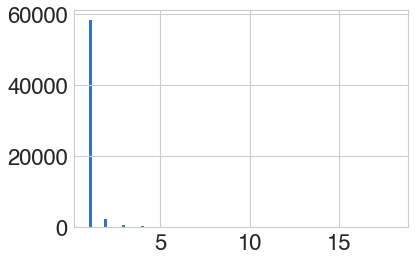

In [25]:
ratings = (utility_matrix > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

Min number of ratings: 1


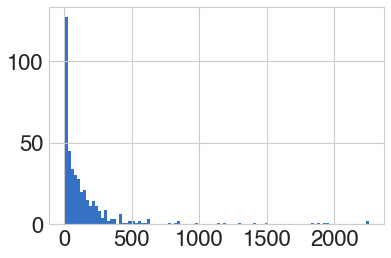

In [26]:
ratings = (utility_matrix > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

In [24]:
number_ratings = (train_df_us['rating'] > 0).sum()
density = number_ratings / (utility_matrix.shape[0] * utility_matrix.shape[1])
print('The density is: {} '.format(density))

The density is: 0.0026086850995049263 
